In [2]:
import statistics
from random import random
import pandas as pd
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn import preprocessing
import seaborn as sns   
    
CROSS_VALIDATION_ITER = 5
TEST_SIZE=0.3

data_file = "../csv/breast_cancer/data.csv"
dataset = pd.read_csv(data_file,index_col=0)
answers = pd.array(list(map(lambda x: 0.0 if x == 'M' else 1.0, dataset['diagnosis'])))

del dataset["Unnamed: 32"]

dataset.describe() 



,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


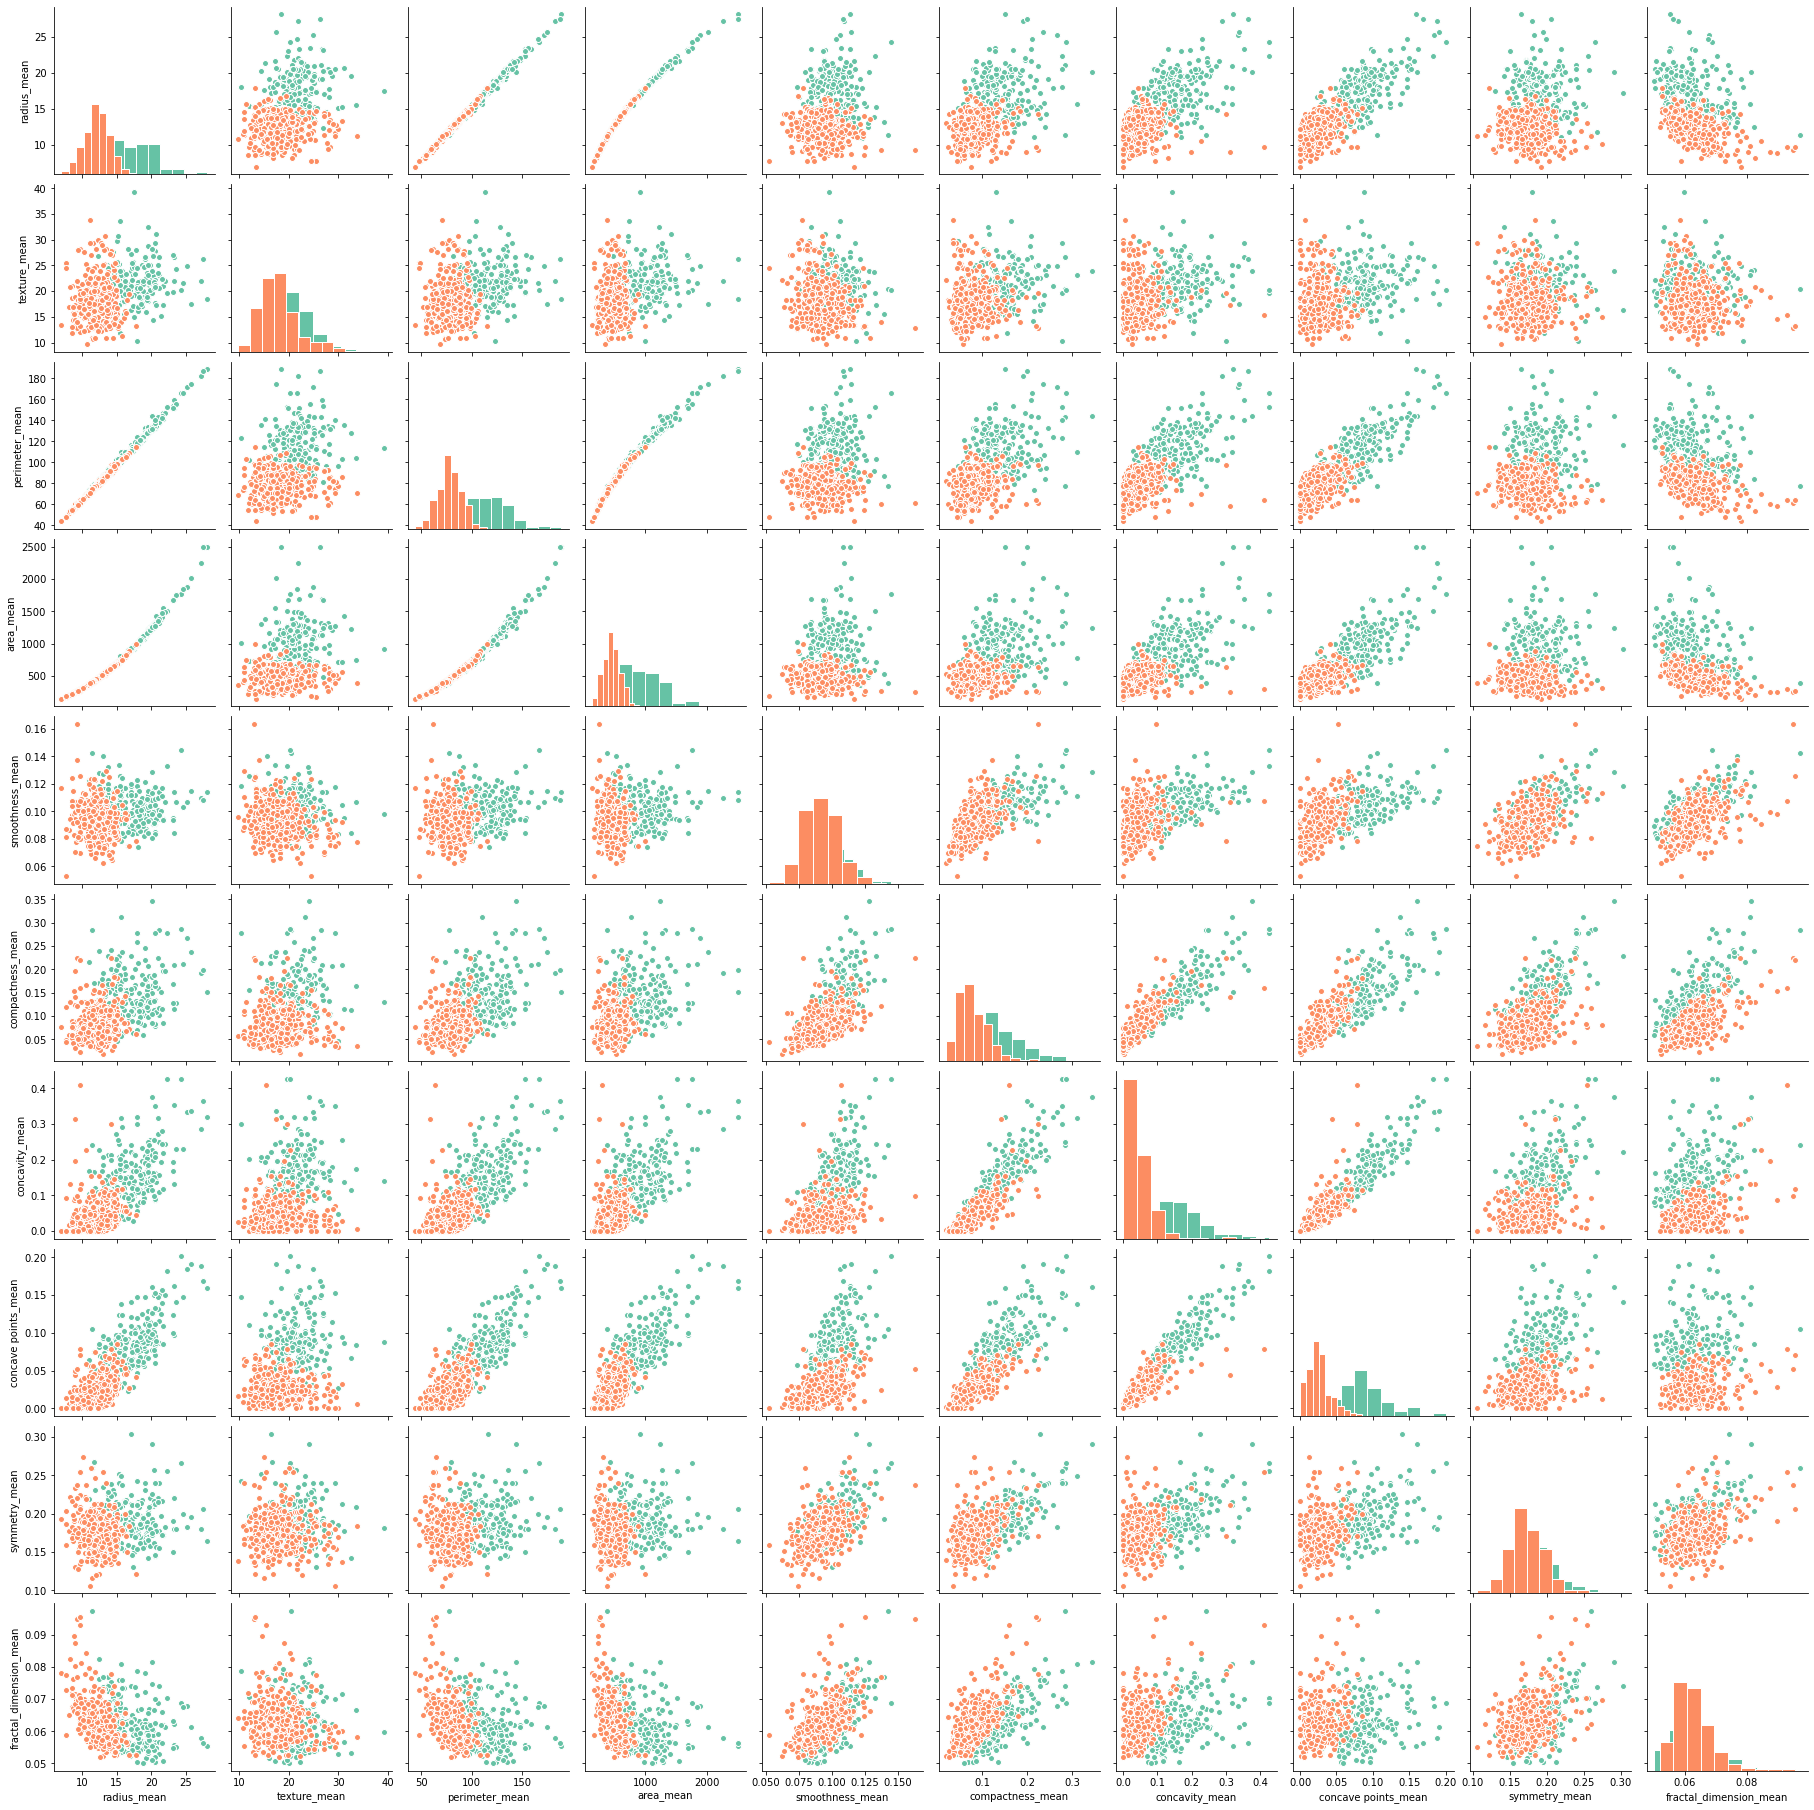

In [3]:
start = 0
stop = 11
# show all pairs takes a lot of time)
ax = sns.PairGrid(dataset.iloc[:,start:stop], hue='diagnosis', palette="Set2")
ax = ax.map_diag(plt.hist, edgecolor="w")
ax = ax.map_offdiag(plt.scatter, edgecolor="w")
plt.show()

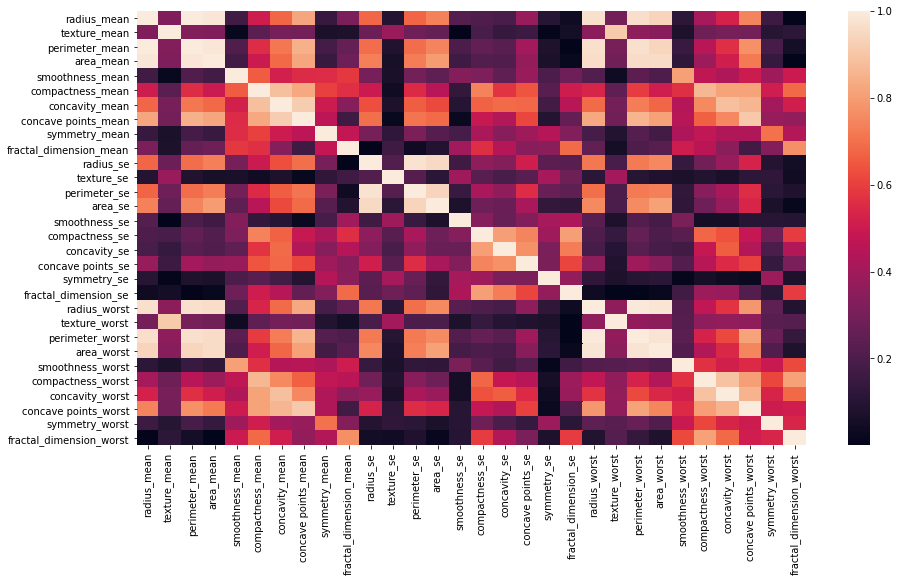

In [31]:
plt.figure(figsize=(15,8))
ax = sns.heatmap(dataset.corr().abs())

In [18]:
dataset = pd.read_csv(data_file,index_col=0)
answers = pd.array(list(map(lambda x: 0.0 if x == 'M' else 1.0, dataset['diagnosis'])))
del dataset['diagnosis']

del dataset["Unnamed: 32"]

dataset.describe() 

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [8]:
acc = []
for i in range(CROSS_VALIDATION_ITER):
    X_train, X_test, y_train, y_test = train_test_split(dataset, answers, test_size=TEST_SIZE,
                                                        random_state=int(random() * 100))
    knn = KNeighborsClassifier()
    knn.fit(X_train, y_train)
    acc.append(knn.score(X_test, y_test))
    print(classification_report(y_test, knn.predict(X_test)))

print("Mean acc with default settings: {}".format(statistics.mean(acc)))
# Mean acc with default settings(K = 5): 0.9272340425531915

Mean acc with default settings: 0.9319298245614035


In [9]:
max_acc = []
acc_by_K = dict()

for i in range(CROSS_VALIDATION_ITER):
    X_train, X_test, y_train, y_test = train_test_split(dataset, answers, test_size=TEST_SIZE,
                                                        random_state=int(random() * 100))
    scores = dict()

    for k in range(1, 20):
        if k not in acc_by_K.keys():
            acc_by_K[k] = []
        knn = KNeighborsClassifier(k)
        knn.fit(X_train, y_train)
        scores[k] = knn.score(X_test, y_test)
        acc_by_K[k].append(scores[k])
    max_acc.append(max(scores.values()))
    plt.plot(scores.keys(), scores.values())
    plt.xlabel("K neighbours")
    plt.ylabel("accuracy")
    plt.title("Scores by K neighbours, max: " + str(max(scores.values())))
    plt.show()
print("Mean acc: " + str(statistics.mean(max_acc)))

mean_for_K = dict()
for i in acc_by_K:
    mean_for_K[i] = statistics.mean(acc_by_K[i])
max_K, max_K_value = "", 0

for key in mean_for_K:
    if mean_for_K[key] > max_K_value:
        max_K, max_K_value = key, mean_for_K[key]
print("Max accuracy for K: {}, value: {}".format(max_K, max_K_value))
# Mean acc: 0.9429787234042554
# Max accuracy for K: 10, value: 0.938936170212766

Mean acc: 0.9401169590643275
Max accuracy for K: 10, value: 0.9333333333333333


Mean acc: 0.9733333333333333
Median acc: 0.9766081871345029
Max accuracy for K after scaling : 3, value: 0.9649122807017544


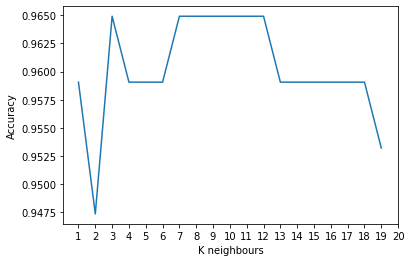

In [22]:

max_acc = []
acc_by_K = dict()

for i in range(CROSS_VALIDATION_ITER):
    X_train, X_test, y_train, y_test = train_test_split(dataset, answers, test_size=TEST_SIZE,
                                                        random_state=int(random() * 100))
    scores = dict()
    X_scaled_train, X_scaled_test = preprocessing.scale(X_train), preprocessing.scale(X_test) 
    for k in range(1, 20):
        if k not in acc_by_K.keys():
            acc_by_K[k] = []
        knn = KNeighborsClassifier(k)
        knn.fit(X_scaled_train, y_train)
        scores[k] = knn.score(X_scaled_test, y_test)
        acc_by_K[k].append(scores[k])
    max_acc.append(max(scores.values()))
print("Mean acc: " + str(statistics.mean(max_acc)))
print("Median acc: " + str(statistics.median(max_acc)))

mean_for_K = dict()
for i in acc_by_K:
    mean_for_K[i] = statistics.median(acc_by_K[i])
max_K, max_K_value = "", 0

for key in mean_for_K:
    if mean_for_K[key] > max_K_value:
        max_K, max_K_value = key, mean_for_K[key]
print("Max accuracy for K after scaling : {}, value: {}".format(max_K, max_K_value))
plt.plot(mean_for_K.keys(), mean_for_K.values())
plt.xlabel("K neighbours")
plt.ylabel("Accuracy")
plt.xticks(range(1,21))
plt.show()


# Mean acc: 0.9685106382978723
# Median acc: 0.973404255319149
# Max accuracy for K after scaling : 3, value: 0.9627659574468085


